In [1]:
import numpy as np 
import pandas as pd
import matplotlib.pyplot as plt
import os
import gzip
from PIL import Image

In [4]:
phi = np.load("Phi_201snap.npy")
R0 = 1.7853     # (m) major radius
xx = np.load('meshR.npy')*R0
zz = np.load('meshZ.npy')*R0

# load data
#R0 = 1.7853
#meshR = np.load('meshR.npy')
#meshZ = np.load('meshZ.npy')
#xx = meshR*R0
#zz = meshZ*R0


/var/folders/8z/f22ph0w97s53rnmbk_922lsh0000gn/T/ipykernel_14731/732232925.py:25: UserWarning: The input coordinates to pcolor are interpreted as cell centers, but are not monotonically increasing or decreasing. This may lead to incorrectly calculated cell edges, in which case, please supply explicit cell edges to pcolor.
  plt.pcolor(xx, zz, phi[:,:,i], shading='auto', cmap='seismic')


,size (PNG),JPG_95 size,JPG_75 size,JPG_50 size
0,NaN,NaN,NaN,NaN
1,NaN,NaN,NaN,NaN
2,NaN,NaN,NaN,NaN
3,NaN,NaN,NaN,NaN
4,NaN,NaN,NaN,NaN
...,...,...,...,...
196,NaN,NaN,NaN,NaN
197,NaN,NaN,NaN,NaN
198,NaN,NaN,NaN,NaN
199,NaN,NaN,NaN,NaN


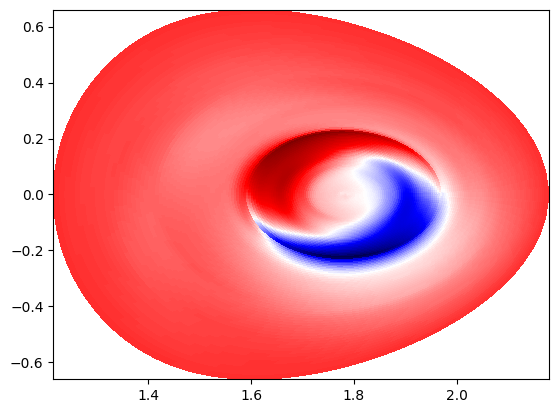

In [47]:
# Steps
# 1. Create the table with appropriate dimensions & labels --> maybe also add PNG & TIFF as img format options?
# 2. Iterate over all 201 images w/ for loop: Do the gzip compression and add it to the table 
# 3. Then do the JPG one, and then do different compressions of the JPG (figure this out)
    # - Don't need to use im.convert, just do plt.savefig directly for each file type
    # - Figure out what to do for the "default" image size, maybe just use PNG? I don't think you should use the actual pixels since 
    # the full image should include the labels as well? I would just do that and then show it to Sam and you can make adjustments as needed

# Supported formats for plt.savefig (from error msg): eps, jpeg, jpg, pdf, pgf, png, ps, raw, rgba, svg, svgz, tif, tiff, webp

# Create the table and starting plot
df = pd.DataFrame(index=np.arange(201), columns=np.arange(4))
df.rename(columns={0: 'size (PNG)', 1: 'JPG_95 size', 2: 'JPG_75 size', 
                   3: 'JPG_50 size', 4: 'JPG_25 size'}, inplace=True)
# The number after "JPG" refers to the image quality on a scale of 1-100, where 95 is the optimal and default quality

# plt.figure(figsize = (6, 6))
# plt.pcolor(xx, zz, phi[:,:,0], shading='auto', cmap='seismic')
# plt.axis('scaled')
# plt.colorbar(orientation='horizontal', shrink=.5)
# plt.xlabel(r'$X/R_0$')
# plt.ylabel(r'$Z/R_0$')

for i in list(range(201)):
    plt.pcolor(xx, zz, phi[:,:,i], shading='auto', cmap='seismic')

    # Save image into different formats, including JPG's of varying quality

    plt.savefig('im.png', bbox_inches='tight')
    plt.savefig('im_95.jpg', bbox_inches='tight')
    im = Image.open('im_95.jpg')
    im.save('im_75.jpg', quality=75)
    im.save('im_50.jpg', quality=50)
    im.save('im_25.jpg', quality=25)
    im.close()
    #with open('im.png', 'rb') as f_in, gzip.open('im.gz', 'wb') as f_out:
        #f_out.writelines(f_in)

    # Compute sizes and add to table
    df.at[i, 'size (PNG)']  = os.path.getsize('im.png')
    #df.at[i, 'gzip size'] = os.path.getsize('im.gz')
    df.at[i, 'JPG_95 size'] = os.path.getsize('im_95.jpg')
    df.at[i, 'JPG_75 size'] = os.path.getsize('im_75.jpg')
    df.at[i, 'JPG_50 size'] = os.path.getsize('im_50.jpg')
    df.at[i, 'JPG_25 size'] = os.path.getsize('im_25.jpg')

df

    
# gzip part: see https://stackoverflow.com/questions/8156707/gzip-a-file-in-python

# For calculating the norm stuff, try this: https://stackoverflow.com/questions/189943/how-can-i-quantify-difference-between-two-images
# - but also look for other sources this is just one i found quickly

# img = np.array(NewGrayScaleImage.bruh.moment of inertia) :::

    

In [19]:
# Export as CSV
df.to_csv("img_compression.csv")

In [ ]:
plt.figure(figsize = (6, 6))
plt.pcolor(xx, zz, phi[:,:,0], shading='auto', cmap='seismic')
plt.axis('scaled')
plt.colorbar(orientation='horizontal', shrink=.5)
plt.xlabel(r'$X/R_0$')
plt.ylabel(r'$Z/R_0$')

plt.pcolor(xx, zz, phi[:,:,i], shading='auto', cmap='seismic')

    # Save image into different formats, including JPG's of varying quality
    plt.savefig('im.png')
    plt.savefig('im_95.jpg')
    im = Image.open('im_95.jpg')
    im.save('im_75.jpg', quality=75)
    im.save('im_50.jpg', quality=50)
    im.save('im_25.jpg', quality=25)

# know what to do now: first you can just convert an im.png and im_75.jpg into numpy arrays and get their sizes so you just 
# have an idea of at least what the sizes look like. 
# - Then after you do this, you can do the rescaling easily, because you can just rescale the larger array to the dimensions of
# - the smaller one. Easy! see https://stackoverflow.com/questions/48121916/numpy-resize-rescale-image

In [52]:
phi2 = phi[:,:,160]
im = Image.fromarray(phi2)
im = im.convert("RGB")
im.save('bruh.jpeg')
# f = gzip.GzipFile("my_array.npy.gz", "w")
# np.save(file=f, arr=phi2)
# f.close()
# f1 = gzip.GzipFile("my_array.npy.gz", "r")
# f1.size

/var/folders/8z/f22ph0w97s53rnmbk_922lsh0000gn/T/ipykernel_14731/2536619900.py:10: UserWarning: The input coordinates to pcolor are interpreted as cell centers, but are not monotonically increasing or decreasing. This may lead to incorrectly calculated cell edges, in which case, please supply explicit cell edges to pcolor.
  plt.pcolor(xx, zz, phi[:,:,160], shading='auto', cmap='seismic')


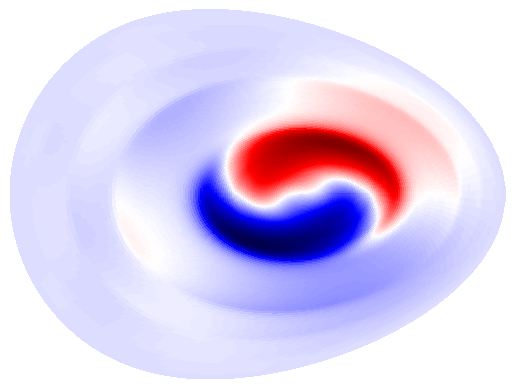

array([640., 480.])

<Figure size 640x480 with 0 Axes>

In [35]:
# Just redo everything here and forget about the stuff above. Need to find a way to get the graphs w/o the labels 
import numpy as np 
import matplotlib.pyplot as plt

phi = np.load("Phi_201snap.npy")
R0 = 1.7853     # (m) major radius
xx = np.load('meshR.npy')*R0
zz = np.load('meshZ.npy')*R0

plt.pcolor(xx, zz, phi[:,:,160], shading='auto', cmap='seismic')
frame = plt.gca()
frame.axes.get_xaxis().set_visible(False)
frame.axes.get_yaxis().set_visible(False)
frame.axis('off')
plt.show()

fig = plt.figure()
size = fig.get_size_inches()*fig.dpi # size in pixels
size

In [ ]:
# Steps now
# Need to find a way to do this process without it taking forever. I think the loading/storing is taking too long

# Also in the 2nd to last box above, when i try to do that the image is just a black box